In [1]:
#%% Add to path
import sys
%cd ..

with open('python_paths.txt', 'r') as f:
    paths = f.read().splitlines()
for path in paths:
    if path not in sys.path:
        sys.path.append(path)

        
print(sys.path)
print(sys.executable)

/media/theodore/HDD1/These/projets/superpixels
['/media/theodore/HDD1/These/projets/superpixels/Notebooks', '/usr/lib/python37.zip', '/usr/lib/python3.7', '/usr/lib/python3.7/lib-dynload', '', '/media/theodore/HDD1/Spondi/SpondiDetect/venv/lib/python3.7/site-packages', '/media/theodore/HDD1/Spondi/SpondiDetect/venv/lib/python3.7/site-packages/SimpleITK-1.2.0rc2.dev1162+g2a79d-py3.7-linux-x86_64.egg', '/media/theodore/HDD1/Spondi/SpondiDetect/venv/lib/python3.7/site-packages/IPython/extensions', '/home/theodore/.ipython', '.']
/media/theodore/HDD1/Spondi/SpondiDetect/venv/bin/python3


In [15]:
from importlib import reload

import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndimage

import src.plotter as p
import src.superpixel_models.superpixel as sp
import src.superpixel_models.slic as slic
import src.superpixel_models.hiersup as hs

def reload_modules():
    for modl in [p, sp, slic, hs]:
        reload(modl)

reload_modules()

In [3]:
img_path = "./data/img.jpg"

img = plt.imread(img_path)
img = (img - img.min()) / (img.max() - img.min())

In [4]:
img_path = "./data/img_spondi.npy"

img = np.load(img_path)
img = (img - img.min()) / (img.max() - img.min())

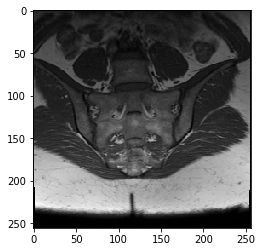

In [5]:
plt.imshow(img, cmap="gray")

# Slic

In [92]:
reload(slic)
model = slic.SLIC(K=100, m=.01, thresh=1, maxit=5)


In [93]:
model.fit(img, False)

Current iteration: 1 / 5. Error: 609.5244998310686
Current iteration: 2 / 5. Error: 225.39182623186133
Current iteration: 3 / 5. Error: 101.06489947271791
Current iteration: 4 / 5. Error: 41.47933379395827
Current iteration: 5 / 5. Error: 20.59969980111548


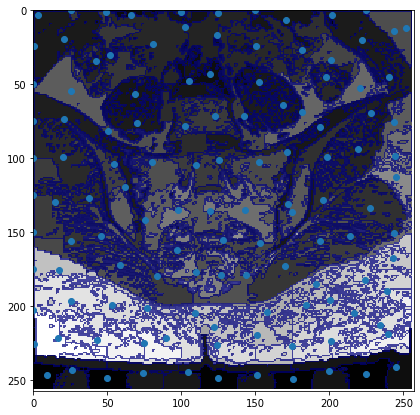

In [95]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
mask = model.infer_superpixel_img()
p.plot_img_mask_on_ax(ax, model.infer_superpixel_img(), model.infer_superpixel_edges())
ax.scatter(np.stack(model.centers)[:, 2], np.stack(model.centers)[:, 1])

ax.set_xlim(0, 257);
ax.set_ylim(257, 0);

(array([14.,  5.,  7.,  9., 15., 18., 14.,  6.,  6., 27.]),
 array([0.15195247, 0.22218486, 0.29241725, 0.36264964, 0.43288203,
        0.50311441, 0.5733468 , 0.64357919, 0.71381158, 0.78404397,
        0.85427635]),
 <a list of 10 Patch objects>)

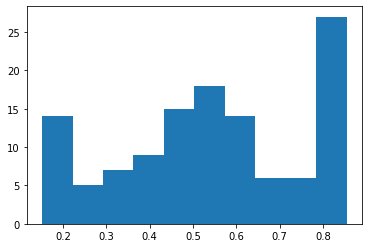

In [44]:
plt.hist(model.centers[:, 0])

(array([  607.,  8441.,  5618.,  8786.,  9627., 12757., 10329.,  4905.,
         5237.,   257.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

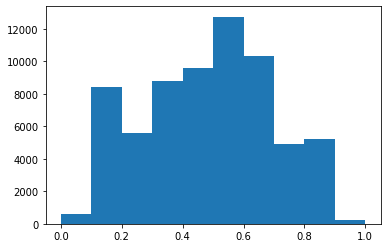

In [45]:
plt.hist(img[img==img])

In [59]:
im2 = model.infer_superpixel_img()

# My method

In [6]:
reload_modules()
sp1 = sp.SuperpixelImage(img)

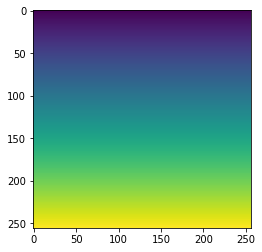

In [7]:
pix_lab = sp1.array_label
plt.imshow(pix_lab)

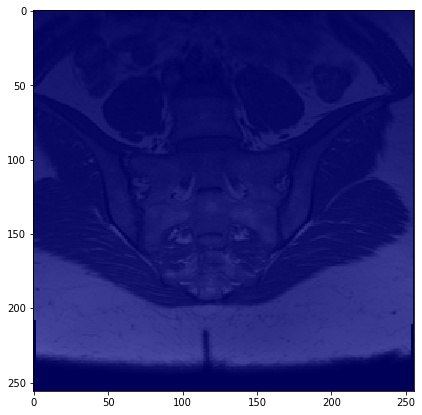

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
p.plot_img_mask_on_ax(ax, sp1.array_means, sp1.infer_superpixel_edges())

In [10]:
%%time
for sp in sp1:
    sp.value()

CPU times: user 549 ms, sys: 0 ns, total: 549 ms
Wall time: 548 ms


In [44]:
reload_modules()
model = hs.Hiersup(K=100)

In [45]:
model.fit(img)

0.0 1.0


AttributeError: 'NoneType' object has no attribute 'value'

In [65]:
%%time
# l = list(range(256**2))
-1 in l

CPU times: user 644 µs, sys: 0 ns, total: 644 µs
Wall time: 648 µs


False